In [1]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 
import pickle

%matplotlib inline

## Load file

In [2]:
with open ('outfile', 'rb') as fp:
    data = pickle.load(fp)

## helper functions

In [11]:
def set_point(image, class_int, coords, color, scale = 256, radius = 6):
    font = cv.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    lineType = 1

    scaled_coord = (int(coords[1]*scale), int(coords[0]*scale))
    cv.circle(image,scaled_coord,radius,color)
    cv.putText(image,f'{class_int}', scaled_coord, font, fontScale,color,lineType)

# Wichtiger part! Beim wiederholten Ausfuehren der Zelle wird ein anderes Bild angezeigt.

predications vs true values
pred:  [(0.0, 0.0), (240.0, 116.0), (0.0, 0.0), (24.0, 168.0), (244.0, 172.0), (0.0, 0.0)]
true:  [(0.0, 0.0), (244.0, 116.0), (0.0, 0.0), (28.0, 120.0), (244.0, 176.0), (0.0, 0.0)]


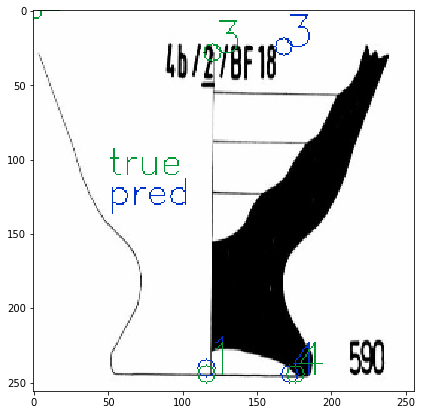

In [24]:
color_pred = (0, 51, 204)
color_true = (0, 153, 51)
plt.figure(figsize=(7,7))

index = np.random.randint(0,len(data)) #selects image

img = cv.cvtColor(data[index][0],cv.COLOR_GRAY2RGB)
for i,(val, val_true) in enumerate(zip(data[index][1], data[index][2])):

    cv.putText(img,'true',(50,110), font, fontScale,color_true,lineType)
    cv.putText(img,'pred',(50,130), font, fontScale,color_pred,lineType)

    set_point(img,i,val,color_pred)
    set_point(img, i, val_true, color_true)


plt.imshow(img/255)

print('predications vs true values')
print('pred: ',[(lambda i,v: (i*256, v*256))(i,v) for i,v in data[index][1]])
print('true: ',[(lambda i,v: (i*256, v*256))(i,v) for i,v in data[index][2]])

# class names

In [18]:
with open ('keypoints', 'rb') as fp:
    keypoints = pickle.load(fp)
print('Keypoints')
_ = [print(key,': ',val) for key, val in keypoints.items()]

Keypoints
Top_Rot :  0
Base_Rot :  1
Down_Rot :  2
Up_Rot :  3
Base_Side :  4
Top_Side :  5
